In [102]:
import pandas as pd # 데이터 분석 목적
import matplotlib.pyplot as plt # 데이터 시각화 목적(산점도 그래프)

In [103]:
plt.rc('font',family="Malgun Gothic") # 데이터 시각화 글씨체 지정
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지

In [104]:
datacase=pd.read_csv("data/LinearRegressionData.csv")
datacase.head()

ParserError: Error tokenizing data. C error: Expected 2 fields in line 25, saw 3


In [ ]:
# 독립변수(X:1개 이상인 경우여서 대문자로 표현) → 종속변수
X=datacase.iloc[:,:-1].values # 독립변수 모든 행에 -1열(점수) 전까지 출력
y=datacase.iloc[:,-1].values #종속변수 모든 행에 -1열(점수)만 출력
X.shape # Values경우 대괄호 안에 대괄호로 2차항변(Shape 시 20행 1열)
y.shape #Values 경우 (20, ) 출력 1차항변임

(23,)

In [ ]:
from sklearn.linear_model import LinearRegression # 머신러닝 활용 패키지

In [ ]:
reg=LinearRegression() # 머신러닝 모델을 생성함

reg.fit(X, y) # 학습을 시작(독립변수와 종속변수를 넣음)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#단순선형회귀모델, 점수를 예측함

y_pred=reg.predict(X) # X(시간)에 대한 예측을 하는 것을 변수 y_pred에 넣음
X, y_pred, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ],
        [ 1. ],
        [ 2. ],
        [10. ]]),
 array([35.08006909, 38.136334  , 40.75598963, 43.37564526, 44.2488638 ,
        46.86851943, 49.92478433, 52.10783069, 52.54443996, 54.72748632,
        56.03731414, 58.2203605 , 59.09357904, 59.53018831, 59.96679758,
        63.02306249, 64.3328903 , 69.57220156, 70.44542011, 76.55794991,
        37.26311545, 41.62920817, 76.55794991]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100, 100, 100,  10]))

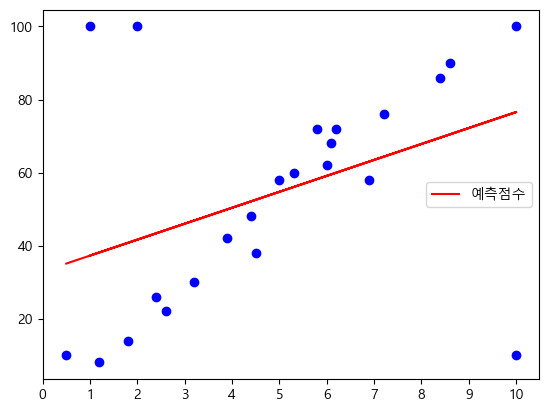

In [ ]:
plt.scatter(X, y, color="blue") #실제 점수 X y에 대한 산점도 그래프
plt.plot(X, y_pred, color='red', label='예측점수') # 최소제곱곤으로 예측한 직선(머신러닝 활용을 통한 예측)
xtick=[x for x in range(11)] # 실제값에 반영하여(시간마다) X축 단위 설정
plt.xticks(xtick) # X축 단위 적용
plt.legend()
plt.show()

In [ ]:
pred=reg.predict([[9], [7],[4]]) #만약 9,7,4 시간을 공부했을 때 약 93,72,41 예측이됨
pred

#모델을 생성하여 // 데이터 값을 넣고 // 적용한다.

array([72.19185719, 63.45967176, 50.36139361])

In [ ]:
m=reg.coef_ # 예측 점수의 기울기 확인
m
b=reg.intercept_
y=m*9+b
m, b, y

(array([4.36609272]), np.float64(32.8970227339476), array([72.19185719]))

In [ ]:
#단순선형회귀모델 함수화
#선형회기모델을 생성해주는 모델 생성
def model_liner(): # 변수 선언
    import pandas as pd #데이터 분석
    from sklearn.linear_model import LinearRegression # 학습데이터 모델링 분석

    dataset=pd.read_csv("data/LinearRegressionData.csv")
    X=dataset.iloc[:,:-1].values 
    y=dataset.iloc[:,-1].values # X,y 값 가져올 때 values값만 가지고 옴

    reg=LinearRegression() #모델 틀을 생성
    reg.fit(X, y) #독립변수/ 종속변수로 학습을 시작
    return reg

In [ ]:
model=model_liner() #선형회귀모델 생성(함수 만든 후)
model.predict([[9]])
#출력 array([93.77478776]) X(공부시간) 9시간 투입 시 약 93.7점 예측(y)

array([72.19185719])

In [ ]:
#모델 생성
def predict(hour):
    model=model_liner()
    pred=model.predict([[hour]])
    print(f'{hour}시간 공부했을때 예상 점수 : {pred[0]:.2f}')
    
predict(9)

9시간 공부했을때 예상 점수 : 72.19


In [ ]:
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
X=datacase.iloc[:, :-1].values
y=datacase.iloc[:,-1].values
X.shape, y.shape

((23, 1), (23,))

In [ ]:
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

array([[ 1.2],
       [ 6.1],
       [10. ],
       [ 7.2],
       [ 4.5],
       [ 3.9],
       [ 8.4],
       [ 2.6],
       [ 1.8],
       [ 3.2],
       [ 8.6],
       [ 5. ],
       [ 4.4],
       [10. ],
       [ 2.4],
       [ 0.5],
       [ 6.9],
       [ 6. ]])

In [ ]:
X_train

array([[ 1.2],
       [ 6.1],
       [10. ],
       [ 7.2],
       [ 4.5],
       [ 3.9],
       [ 8.4],
       [ 2.6],
       [ 1.8],
       [ 3.2],
       [ 8.6],
       [ 5. ],
       [ 4.4],
       [10. ],
       [ 2.4],
       [ 0.5],
       [ 6.9],
       [ 6. ]])

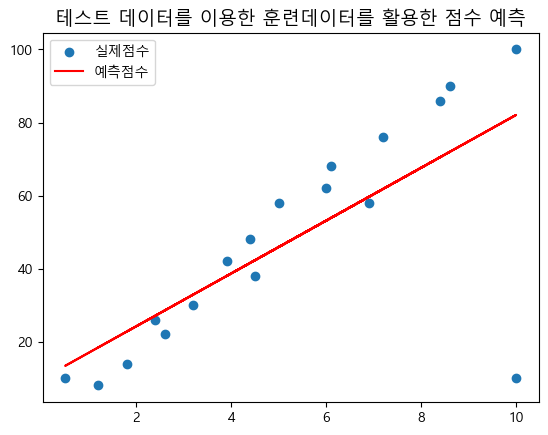

In [ ]:
#전체 데이터를 테스트 데이터/훈련 데이터를 통해 예측하여 점수를 예측함
reg=LinearRegression()
reg.fit(X_train, y_train)

plt.scatter(X_train,y_train, label='실제점수')
plt.plot(X_train, reg.predict(X_train), label='예측점수',color='r')
plt.legend()
plt.title('테스트 데이터를 이용한 훈련데이터를 활용한 점수 예측', size=13.5)
plt.show()

In [ ]:
#학습 데이터 검증하기(최소제곱법을 이용한 단순선형회기)
reg=LinearRegression()
reg.fit(X,y)
reg.score(X, y)
reg.fit(X_train, y_train)
reg.score(X_train, y_train)  #훈련 데이터로 점수 예측

reg=LinearRegression()
reg.fit(X_test, y_test)
reg.score(X_test,y_test) #테스트 데이터로 점수를 예측

0.8307352711361151

In [ ]:
#9/23 복습
import pandas as pd # 데이터 분석 목적
import matplotlib.pyplot as plt # 데이터 시각화 목적(산점도 그래프)
plt.rc('font',family="Malgun Gothic") # 데이터 시각화 글씨체 지정
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지

In [ ]:
#최소제곱법(선형회귀 단순선형회귀 Skikit-learn)
 #1. 데이터 가져오기
dataset=pd.read_csv('data/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [ ]:
from sklearn.linear_model import LinearRegression
 #2. 독립변수/종속변수 가져오기
X=dataset.iloc[:,:-1].values #.values를 통해 값만 가지고 옴
y=dataset.iloc[:,-1].values

 #3. LinearRegression을 만드는 클래스
reg=LinearRegression()
 #4. 학습
reg.fit(X,y)

 #5. 예제 9시간 공부 시 점수?
pred=reg.predict([[9]])
print(pred[0],pred.shape)

 #6. 8,7,5시간 공부 시 점수?
pred=reg.predict([[8],[7],[5]])
print(pred[0],pred[1],pred[2],pred.shape)

72.19185719476926 (1,)
67.82576447690019 63.45967175903111 54.727486323292965 (3,)


In [ ]:
import math
import numpy as np # 1씩 증가를 위한 함수
max=math.ceil(X.max()) #math 함수 적용  # max=int(X.max()) #정수값을 위한 int
xticks=[x for x in np.arange(0, max+1, 0.5)]
xticks

[np.float64(0.0),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0),
 np.float64(5.5),
 np.float64(6.0),
 np.float64(6.5),
 np.float64(7.0),
 np.float64(7.5),
 np.float64(8.0),
 np.float64(8.5),
 np.float64(9.0),
 np.float64(9.5),
 np.float64(10.0),
 np.float64(10.5)]

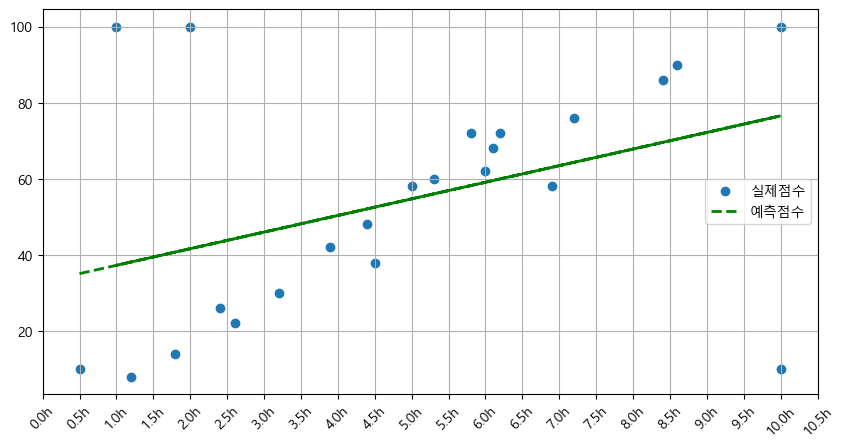

In [ ]:
#실제점수와 예측점수를 시각화 작업을 수행(실제점수는 점, 예측점수는 선[꺾은선])

 #1. 실제점수(점)
plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')

 #2. 예측점수(꺾은선)_예측점수이므로 reg.predict(X)
plt.plot(X,reg.predict(X),color='green',ls='--',lw=2, label='예측점수')

plt.grid(True) #격자무늬 생성하기
plt.xticks(xticks,[f'{x}h'for x in xticks], rotation=45)
# plt.xticks(xticks,[f'{x}h'for x in xticks], size=1, rotation=45)
plt.legend()
plt.show()

In [ ]:
#다중 회귀분석 모델
m=reg.coef_ # 기울기
b=reg.intercept_ # y절편 구하기
y=m*9+b #reg.predict([[9]]) 에측기법과 같음 y=m*9+b ==reg.predict([[9]])
y

array([72.19185719])

In [ ]:
reg.predict([[9]])

array([72.19185719])

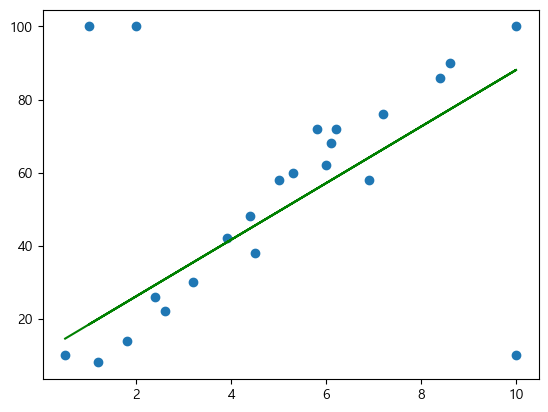

In [ ]:
#경사하강법을 이용한 모델링
from sklearn.linear_model import SGDRegressor #경사하강법
X=dataset.iloc[:,:-1].values #.values를 통해 값만 가지고 옴
y=dataset.iloc[:,-1].values
sr=SGDRegressor()
sr.fit(X,y) #학습 시작

# 9시간 공부했을 경우
sr.predict([[9]])

plt.scatter(X,y)
plt.plot(X, sr.predict(X), color='g')
plt.show()


In [ ]:
sr=SGDRegressor(max_iter=150, eta0=0.0001, random_state=0, verbose=1) #iter 반복횟수 // eta0 기울기 // verbose 반복과정
sr.fit(X,y)

-- Epoch 1
Norm: 0.41, NNZs: 1, Bias: 0.074053, T: 23, Avg. loss: 1858.547339
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.68, NNZs: 1, Bias: 0.123144, T: 46, Avg. loss: 1761.808195
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.90, NNZs: 1, Bias: 0.165086, T: 69, Avg. loss: 1690.400444
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 1, Bias: 0.202972, T: 92, Avg. loss: 1629.622532
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.30, NNZs: 1, Bias: 0.237697, T: 115, Avg. loss: 1575.601003
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.47, NNZs: 1, Bias: 0.270079, T: 138, Avg. loss: 1527.114491
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.64, NNZs: 1, Bias: 0.300649, T: 161, Avg. loss: 1482.956677
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.79, NNZs: 1, Bias: 0.329584, T: 184, Avg. loss: 1442.072208
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.94, NNZs: 1, Bias: 0.357086, T: 207, Avg. loss: 1404.214210
Total trainin

c:\Users\AIPM2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,150
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


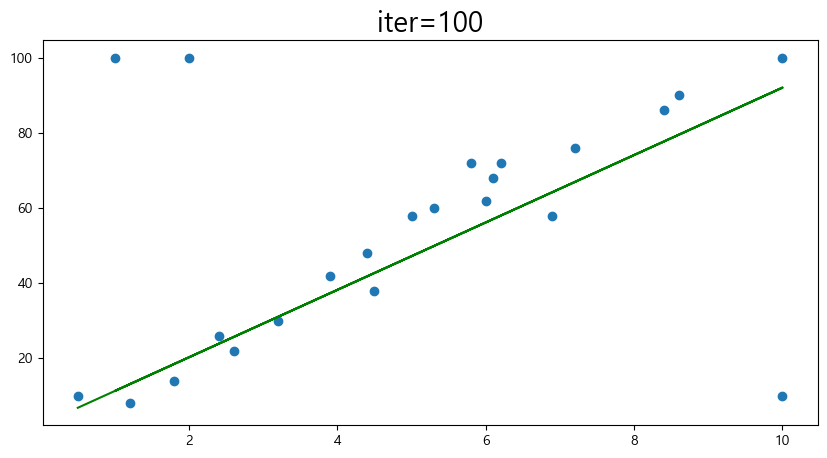

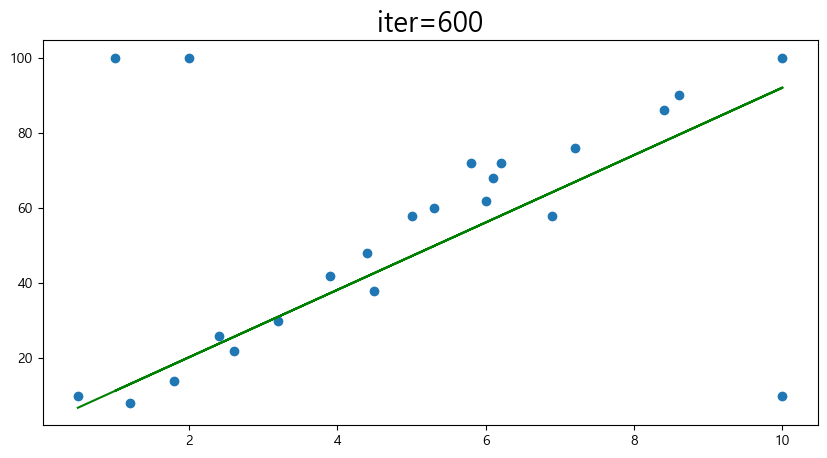

In [ ]:
import time
import warnings
warnings.filterwarnings('ignore')
import warnings
def model_sgd(iter, eta0):
    sr=SGDRegressor(max_iter=iter, eta0=eta0, random_state=0)
    sr.fit(X,y)

    plt.figure(figsize=(10,5))
    plt.scatter(X,y)
    plt.plot(X, sr.predict(X), color='g')
    plt.title(f'iter={i}', size=20)
    plt.show()
    plt.close()

for i in range(100, 1001, 500):
    model_sgd(400,1e-4) 
    time.sleep(3)

In [122]:
# 학습데이터를 훈련데이터와 테스트데이터로 분류하는 작업
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1) #훈련데이터와 테스트데이터의 비율을 8:2로 진행(과적합 문제를 방지목적)(분류마다 데이터가 바뀌어서 다양한 데이터를 통해 훈련 진행 가능)
X_train.shape #18개
X_test.shape #5개
X.shape #23개

# train 데이터로 훈련을 진행하고(18개), test 데이터로 확인을 진행한다(5개) 과적합 문제 해결 가능
sr=SGDRegressor()
sr.fit(X_train,y_train)  #X_test는 5개 데이터의 공부시간
sr.predict(X_train, y_train)



TypeError: BaseSGDRegressor.predict() takes 2 positional arguments but 3 were given